In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [3]:
image_gen1 = ImageDataGenerator(horizontal_flip=True,rescale=1.0/255,rotation_range=3)
image_gen2 = ImageDataGenerator(rescale=1.0/255)

In [59]:
train_data_gen = image_gen1.flow_from_directory('data/train/',target_size=(125,125),batch_size=100)
test_data_gen = image_gen2.flow_from_directory('data/test/',target_size=(125,125),batch_size=624)
val_data_gen = image_gen2.flow_from_directory('data/val/',target_size=(125,125),batch_size=100)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [42]:
x_test, y_test = train_data_gen.next()

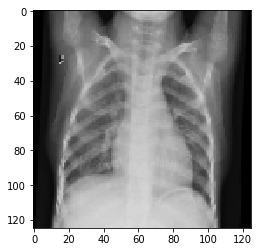

In [43]:
plt.imshow(x_test[5])

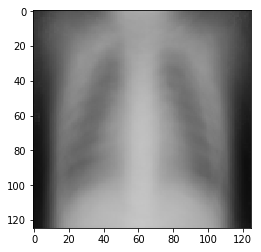

In [44]:
plt.imshow(x_test.mean(axis=0))

In [45]:
train_data_gen.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [46]:
from keras.models import Sequential
from keras.layers import Conv2D,Dense,Dropout,Flatten, MaxPool2D
from keras.optimizers import Adam

In [52]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(125,125,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.3))

model.add(Conv2D(32,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(2, activation='softmax'))

In [53]:
#optimizer
optimizer = Adam(lr=0.0001)
model.compile(optimizer,loss='categorical_crossentropy',metrics=['acc'])

In [54]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 123, 123, 32)      896       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 121, 121, 64)      18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 60, 60, 64)        0         
_________________________________________________________________
dropout_21 (Dropout)         (None, 60, 60, 64)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 58, 58, 32)        18464     
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 56, 56, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 28, 28, 64)        0         
__________

In [55]:
model.fit_generator(train_data_gen,steps_per_epoch=1000,epochs=3,validation_data=val_data_gen)

Epoch 1/3
1000/1000 [==============================] - 8129s 8s/step - loss: 0.1887 - acc: 0.9226 - val_loss: 0.4161 - val_acc: 0.8750
Epoch 2/3
1000/1000 [==============================] - 8133s 8s/step - loss: 0.0827 - acc: 0.9694 - val_loss: 0.1736 - val_acc: 0.9375
Epoch 3/3
1000/1000 [==============================] - 8395s 8s/step - loss: 0.0469 - acc: 0.9830 - val_loss: 0.2129 - val_acc: 0.8750


In [56]:
model.save(filepath='saved_model')
model.save(filepath='saved_model_woo',include_optimizer=False)

In [58]:
X_test, y_test = test_data_gen.next()

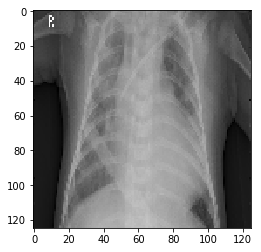

In [65]:
plt.imshow(X_test[0])

In [62]:
score = model.evaluate(X_test,y_test)

624/624 [==============================] - 14s 22ms/step


In [63]:
score

[0.9425532145377917, 0.8108974358974359]

In [64]:
model.metrics_names

['loss', 'acc']